In [69]:
import pandas as pd
import numpy as np
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [70]:
df.shape

(8950, 18)

In [71]:
print(df.shape)
print(df.isnull().sum())
print("Duplicates:",df.duplicated().sum())

(8950, 18)
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Duplicates: 0


In [72]:
df = df.dropna()
print(df.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [74]:
a=df['CUST_ID'].is_unique
print(a)

True


In [75]:
df.drop('CUST_ID', axis=1,inplace=True)

In [76]:
skew_values = df.skew(numeric_only=True)
print(skew_values)



BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64


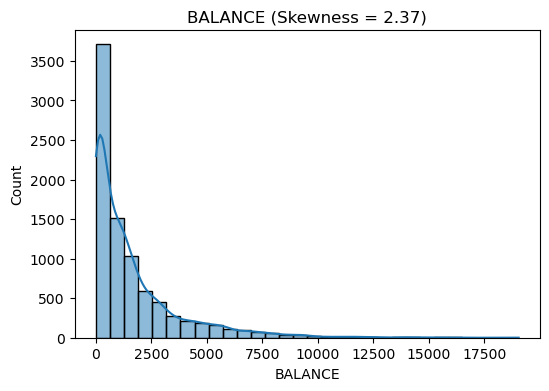

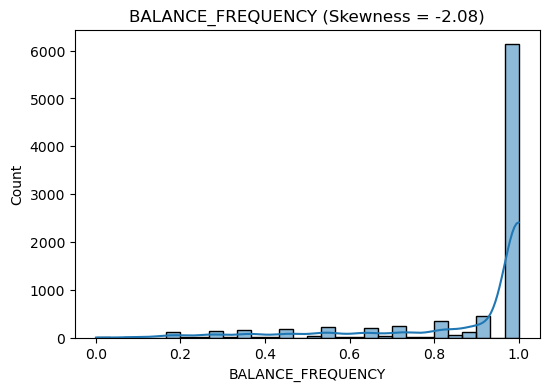

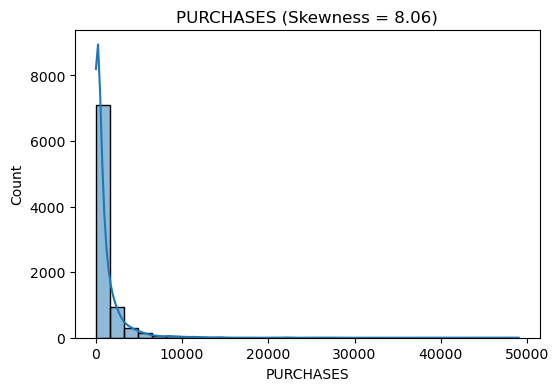

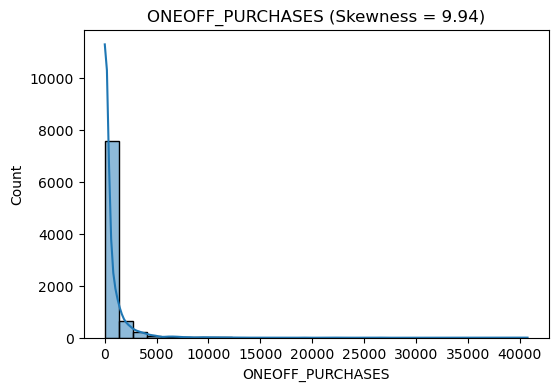

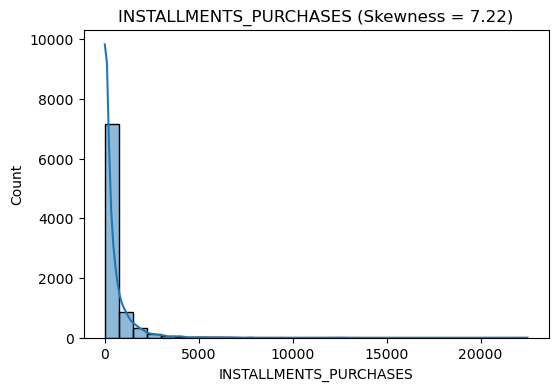

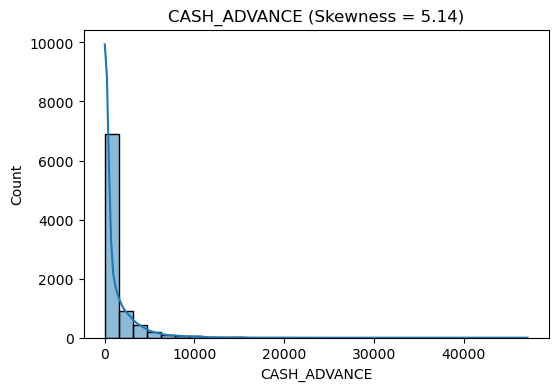

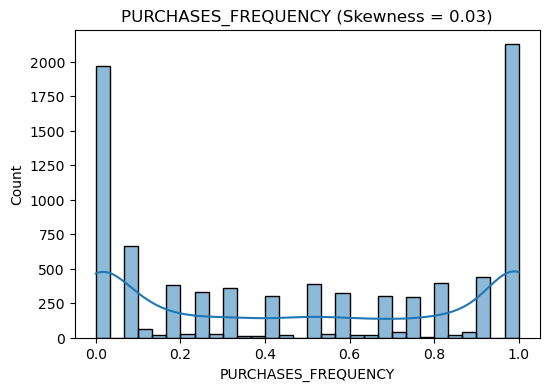

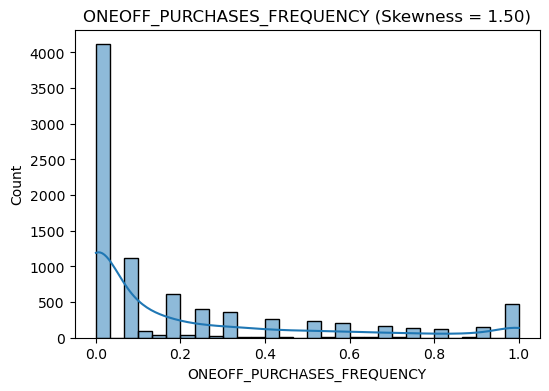

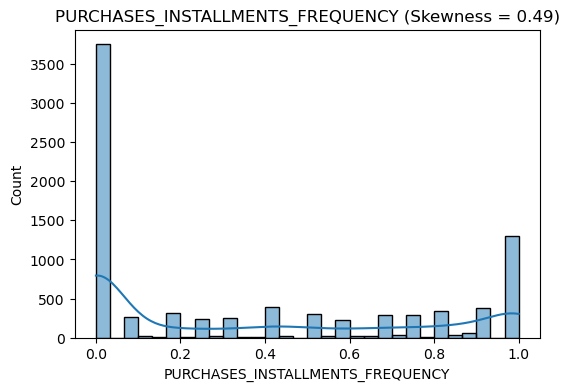

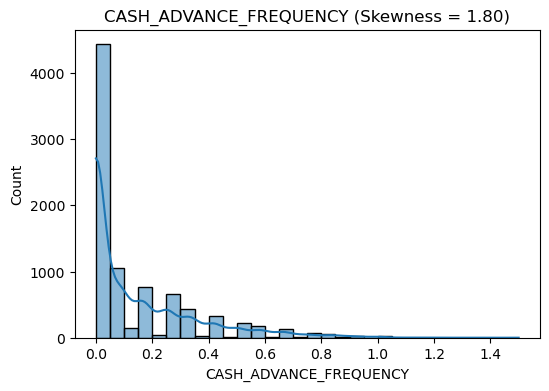

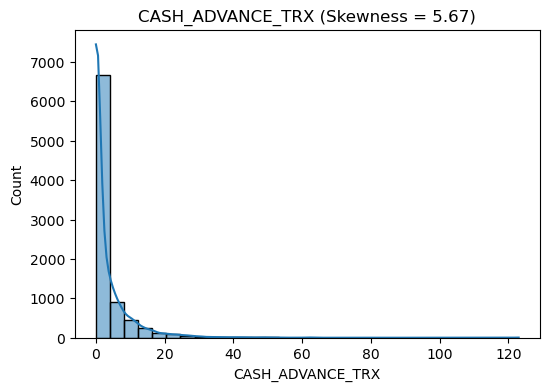

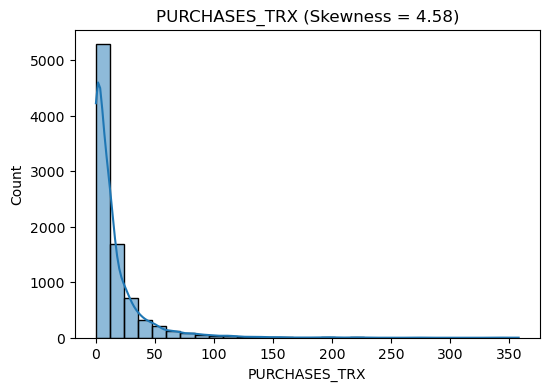

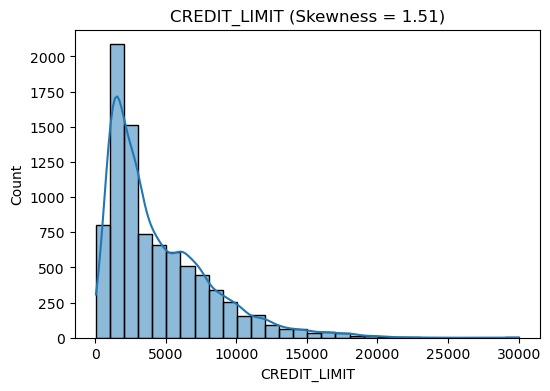

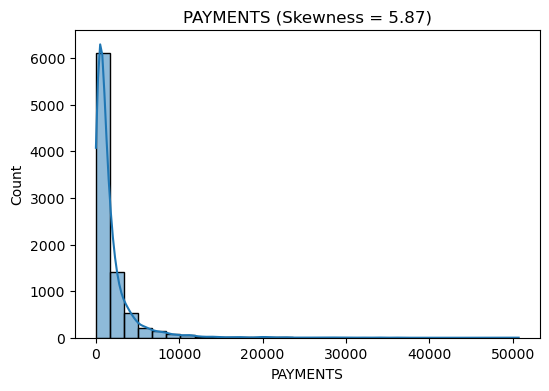

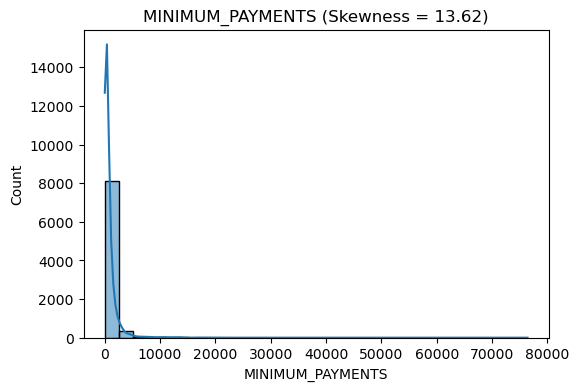

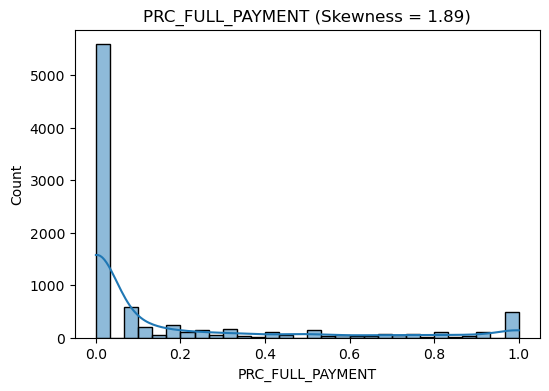

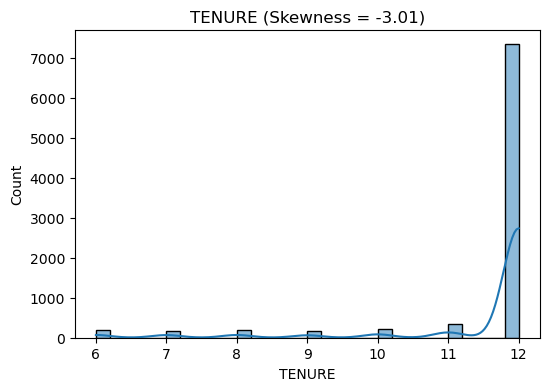

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} (Skewness = {df[col].skew():.2f})")
    plt.show()


Original shape: (8636, 17)
Reduced shape after PCA: (8636, 9)


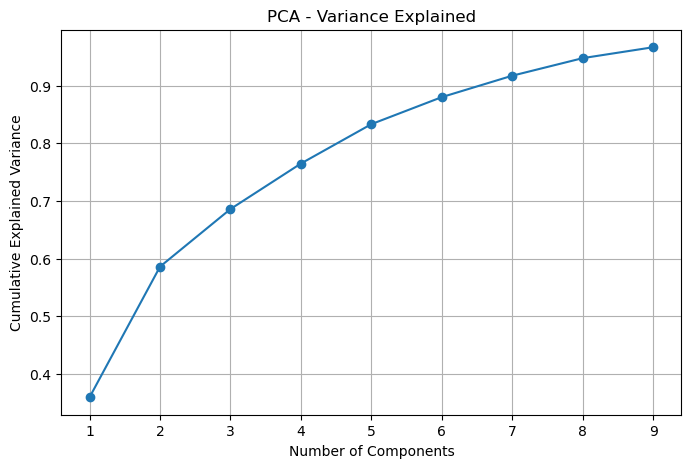

In [78]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(df_numeric)

# Step 2: Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed)

# Step 3: PCA
pca = PCA(n_components=0.95)  # keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", df_numeric.shape)
print("Reduced shape after PCA:", X_pca.shape)

# Step 4: Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd


features = df_numeric.columns

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=features)

print("\n🔎 PCA Loadings (feature contributions):")
print(loadings.head(10))  



🔎 PCA Loadings (feature contributions):
                                       PC1       PC2       PC3       PC4  \
BALANCE                          -0.145106  0.427067 -0.069373 -0.197177   
BALANCE_FREQUENCY                 0.002221  0.286702 -0.224277 -0.389769   
PURCHASES                         0.351342  0.180561  0.093181  0.057150   
ONEOFF_PURCHASES                  0.206295  0.237483  0.493463 -0.021196   
INSTALLMENTS_PURCHASES            0.315363  0.076055 -0.386081  0.121704   
CASH_ADVANCE                     -0.301392  0.237642 -0.088016  0.303995   
PURCHASES_FREQUENCY               0.353088  0.111753 -0.206965  0.071663   
ONEOFF_PURCHASES_FREQUENCY        0.216673  0.242666  0.461114 -0.000881   
PURCHASES_INSTALLMENTS_FREQUENCY  0.307430  0.059673 -0.447202  0.100517   
CASH_ADVANCE_FREQUENCY           -0.294323  0.243427 -0.092749  0.308548   

                                       PC5       PC6       PC7       PC8  \
BALANCE                          -0.014641 -0.

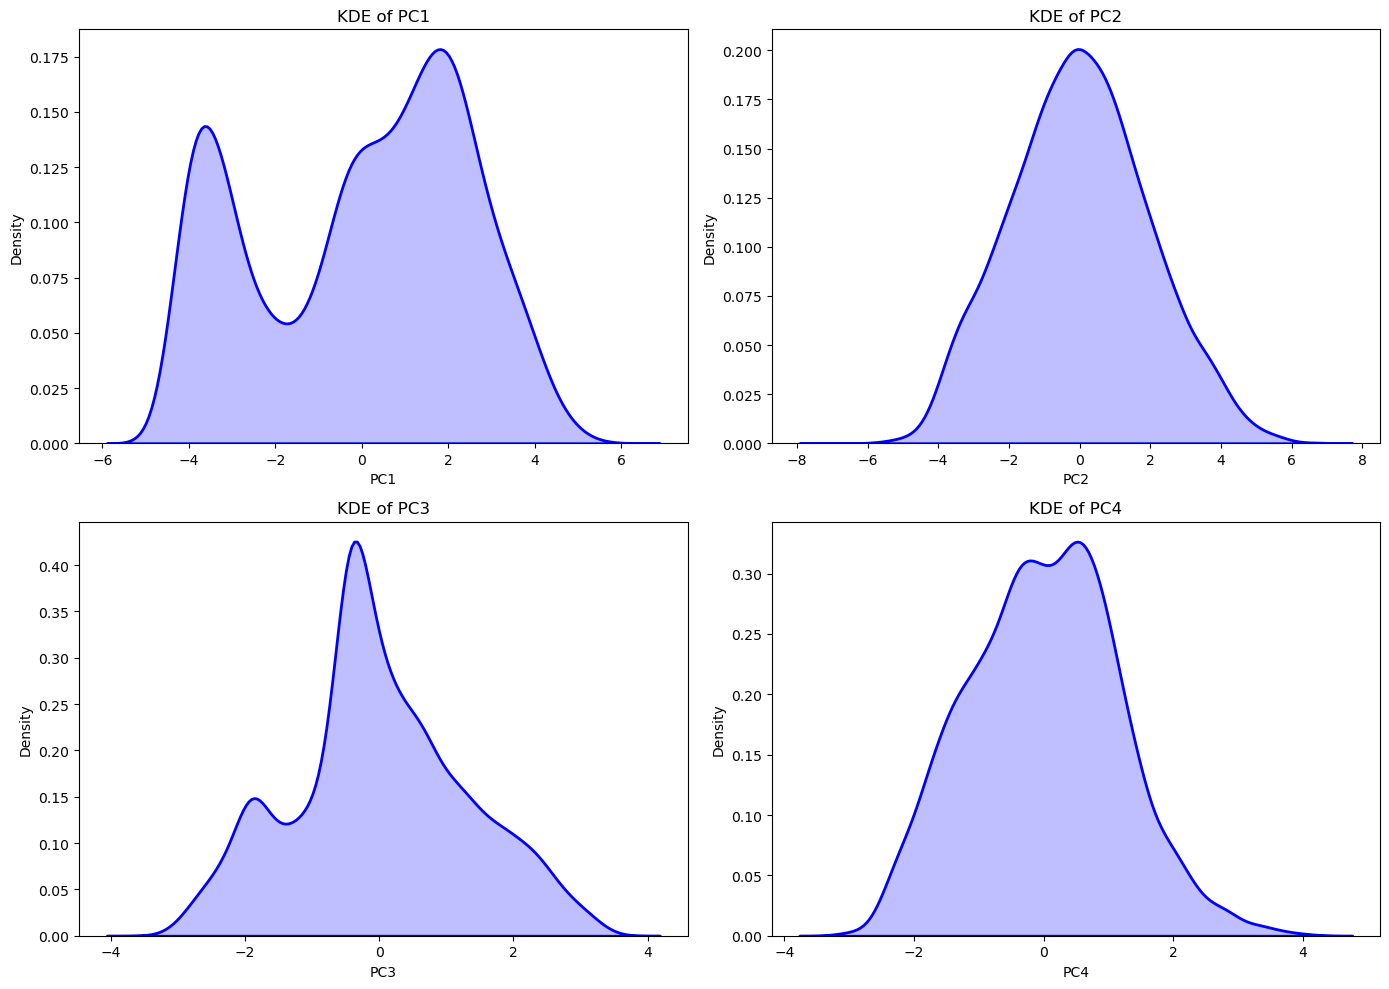

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

pcs_to_plot = ["PC1", "PC2", "PC3", "PC4"]

plt.figure(figsize=(14,10))

for i, pc in enumerate(pcs_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(pca_df[pc], fill=True, color="blue", linewidth=2)
    plt.title(f"KDE of {pc}")

plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

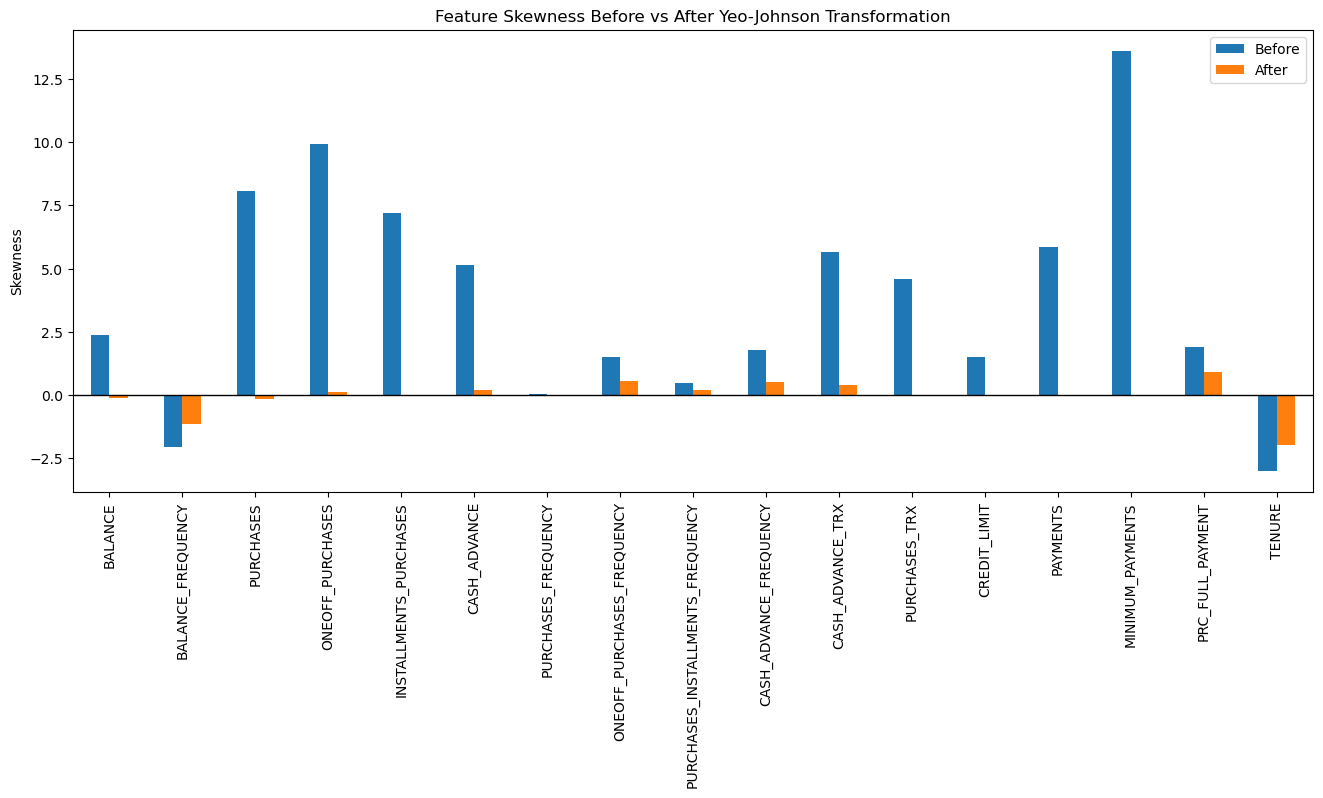

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

skew_before = df_numeric.skew()

df_after = pd.DataFrame(df_transformed, columns=df_numeric.columns)
skew_after = df_after.skew()

skew_df = pd.DataFrame({"Before": skew_before, "After": skew_after})

plt.figure(figsize=(14,6))
skew_df.plot(kind='bar', figsize=(16,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.title("Feature Skewness Before vs After Yeo-Johnson Transformation")
plt.ylabel("Skewness")
plt.show()


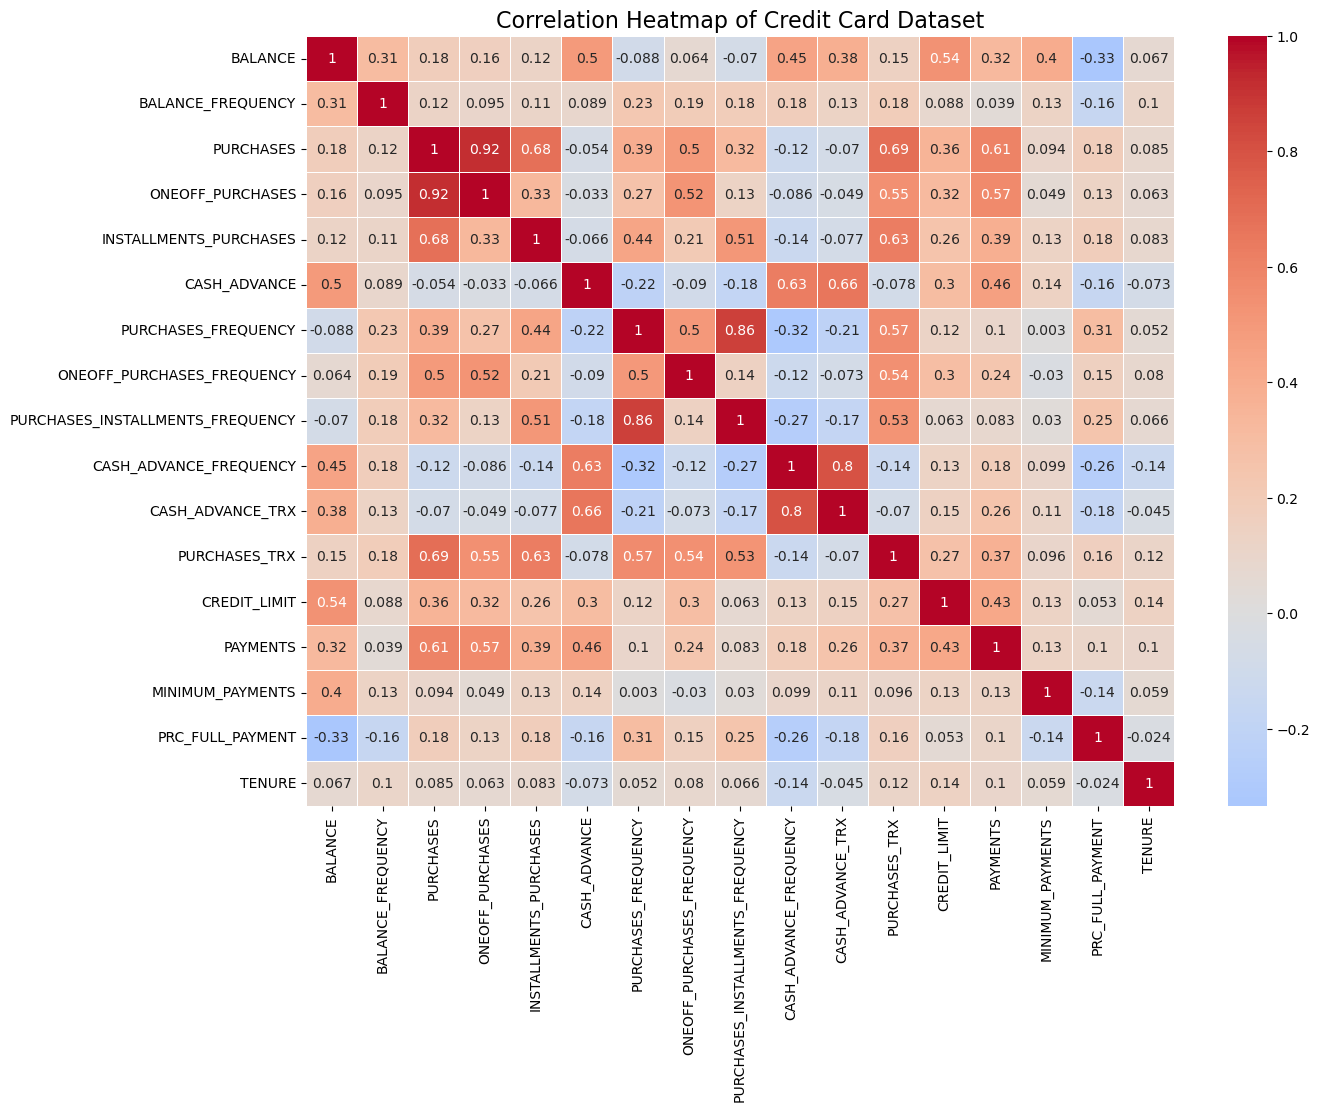

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Credit Card Dataset", fontsize=16)
plt.show()